In [1]:
# Step 1 - Pick K random points as cluster centers called centroids.
# Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid.
# Step 3 - Find new cluster center by taking the average of the assigned points.
# Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


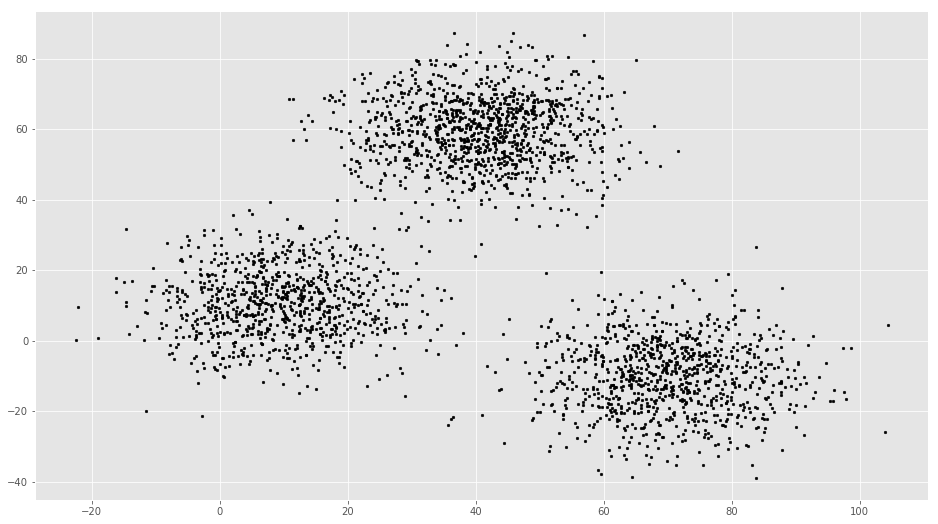

In [4]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.figure(figsize=(16,9))
plt.scatter(f1, f2, c='black', s=7)

In [6]:
# len(X)
X[0:5]

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       [ 11.12067 ,  14.40678 ],
       [ 23.71155 ,   2.557729]])

In [7]:
# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 13.   1.]
 [ 47.  36.]
 [  3.  32.]]


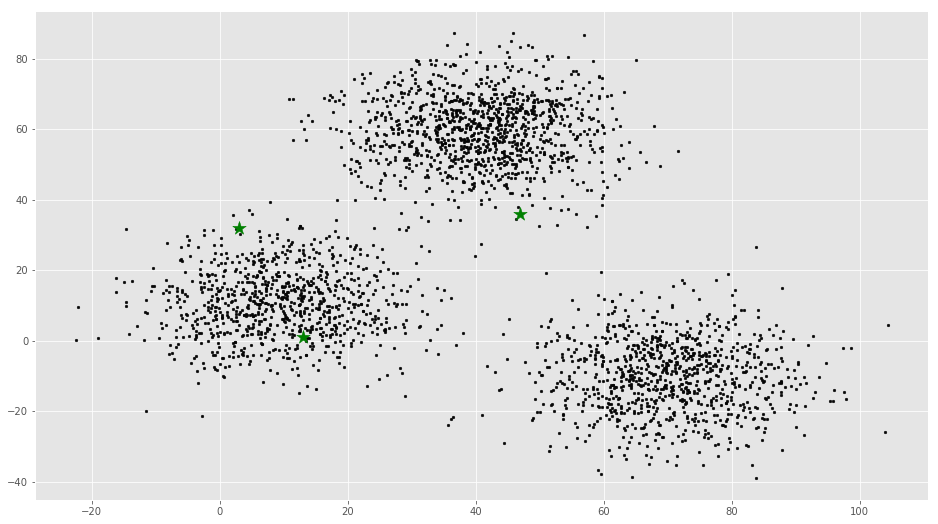

In [9]:
# Plotting along with the Centroids
plt.figure(figsize=(16,9))
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [11]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
#         print("Distance is",distances)
        cluster = np.argmin(distances)
#         print("Cluster is",cluster)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print(points)
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

[array([ 36.17882, -22.1776 ]), array([ 50.97437,  19.26007]), array([ 68.77616, -23.90883]), array([ 56.22534 ,  -5.294665]), array([ 84.62974 ,  -8.592495]), array([ 95.91765, -17.08491]), array([ 66.93266 ,  -3.231932]), array([ 68.5361 , -26.18595]), array([ 76.53591 ,  -3.304326]), array([ 76.23439, -11.4189 ]), array([ 54.16949, -19.01123]), array([ 72.58262, -16.83923]), array([ 81.56219 ,  -1.694383]), array([ 67.99164, -17.64808]), array([ 64.71255, -14.86299]), array([ 70.76205, -13.4053 ]), array([ 80.15953 ,  -1.895146]), array([ 64.54891,  -1.18837]), array([ 72.76769 ,  -1.913954]), array([ 79.9837 , -20.64003]), array([ 79.13871,   3.93355]), array([ 44.28213 ,   1.785785]), array([ 64.1403  ,  -9.613207]), array([ 59.16926,  13.10082]), array([ 81.54203 ,   8.749848]), array([ 74.12215, -22.66961]), array([ 69.51984, -12.94162]), array([ 80.76502 ,  -7.238871]), array([ 54.98248 ,  -5.827399]), array([ 63.85516 ,  -1.502977]), array([ 70.24579, -22.48083]), array([ 64.3

[array([ 24.2999 ,  40.42887]), array([ 37.48364,  34.12808]), array([ 48.1905 ,  56.00667]), array([ 48.32863,  76.0944 ]), array([ 31.44145,  62.66712]), array([ 37.60916,  64.75492]), array([ 52.68577,  71.53609]), array([ 48.723  ,  83.29384]), array([ 31.85518,  59.35438]), array([ 55.55334,  57.31956]), array([ 29.06337,  49.34992]), array([ 50.45302,  78.01416]), array([ 33.5429 ,  51.27797]), array([ 45.11086,  46.34557]), array([ 43.73054,  67.13846]), array([ 55.90229,  44.41355]), array([ 35.51136,  63.02239]), array([ 36.66438,  60.00177]), array([ 39.22292,  42.76795]), array([ 25.76358,  72.0769 ]), array([ 42.31278,  66.04035]), array([ 46.66542,  58.45405]), array([ 57.76221,  50.79996]), array([ 53.64062,  53.19439]), array([ 55.59307,  72.58209]), array([ 34.6382 ,  62.93818]), array([ 68.81378,  49.40914]), array([ 38.22668,  55.08212]), array([ 42.41835,  73.77797]), array([ 44.42384,  52.0499 ]), array([ 32.44594,  52.46474]), array([ 43.85302,  49.00594]), array([

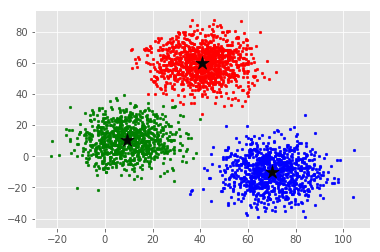

In [24]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
plt.figure(figsize=(16,9))
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')